<span style="font-size:42px"><b>Practise Case 01</b></span><br><br>
<span style="font-size:36px">Initial Data Analysis of German Credit Score Dataset</span>

Copyright 2019 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [66]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Custom function for distribution plot for binary target
def dist_plot_binary(x1, x2):
    # Group data together
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    sns.distplot(x1, ax=ax)
    sns.distplot(x2, ax=ax)
    plt.legend(labels=["Good", "Bad"])
    plt.show()

# Import Data

The original dataset can be found here at [UCI website](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). THe followings are the columns in the data.
* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
* Risk (Value target - Good or Bad Risk)

Date donated: **1994-11-17**

In [14]:
try:
    data = pd.read_csv("csv/german_credit_data.csv")
except FileNotFoundError:
    data = pd.read_csv("https://raw.githubusercontent.com/arikunco/GermanCredit/master/dataset/german_credit_data_with_risk.csv", encoding='latin1')
    data = data.drop('Unnamed: 0', axis=1)
    data.to_csv("csv/german_credit_data.csv", header=True, index=False, sep=',', line_terminator='\n')

# Part A

Answering predefined questions.

## 1. How many rows and columns reflected in the dataset?

In [16]:
print(str.ljust("Total number of rows: ", 20), str.rjust("{}".format(data.shape[0]), 10))
print(str.ljust("Total number of rows: ", 20), str.rjust("{}".format(data.shape[1]), 10))

Total number of rows:        1000
Total number of rows:          10


Total population of germany in year 1995 is around **81 million people**. 

Two possible scenarios:
1. If we assume that people can apply for credit without having a bank account, the **population is this census data.**
2. If we assume that people must have a bank account for applying credit, to estimate how our data reflect the true population, we should see the **population of people having bank account.** 

From this two data, our total sample and total population, we can then estimate the error when measuring distribution of population from the sample dataset, note that we have to know also how the sampling was conducted.

## 2. What is the minimum, maximum, and mean of the customer's age?

In [20]:
data[['Age']].describe().loc[['min', 'max', 'mean'], :]

,Age
min,19.000
max,75.000
mean,35.546


We can see that we have a sample of such young age applying for credit in bank, at **19 years old**, with the mean of the bank customer age at 35 years old. From this data alone, we could further explore on this particular young segment.

## 3. How many are male and how many are female? Why?

In [31]:
data['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

Male to female ratio is 7 : 3. This **may** indicates that man are more likely to apply for a credit from bank. We can compare this ratio to the actual population in Germany during that time. As data of census is available in 5 years interval, we can closely estimates the population ratio by sex by using that from 1995.

From [statista.com](https://www.statista.com/statistics/454338/population-by-gender-germany/), we can see that male to female ratio during that time is 20 : 21, which is relatively even.

There are two possible scenarios:
1. If we assume that people can apply for credit without having a bank account, reflecting to the distribution in our german credit dataset, we should explore further on the cause why **there is a lot more man that apply for credit from bank than women in germany at that time.**
2. If we assume that people must have bank account before applying credit, we can't infer the scenario 1 hypothesis.

## 4. How many high skilled workers customers reflected in the dataset?

In [47]:
data['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

From the official UCI website, the highly skilled customer are those who have job in management, self-employed, highly qualified employee, or officer. If our sample data truly reflect the population data, we have in our customer around **15%** customer who are highly skilled.

This particular segment may indeed be more eligible for credit compared to other group, we can probably say that this segment have lower risk of defaulting.

Answering the questions, there are **148 people** who are highly skilled.

## 5. How many customers who own the house?

In [35]:
data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

Analyzing this distribution, we must first see the actual condition of housing during that time. But we can assume for now that **people who have his/her own house would likely have lower risk of default that those who does not.**

Answering the questions, there are **713 people** who own the house.

## 6. How many customers who have 'rich' Saving accounts?

In [36]:
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

From the actual website, see that the **rich** people are those who has **more than 1000 DM** in their saving accounts.

* A61 : ... < 100 DM
* A62 : 100 <= ... < 500 DM
* A63 : 500 <= ... < 1000 DM
* A64 : .. >= 1000 DM
* A65 : unknown/ no savings account

This particular segment would likely have lower risk of default.

Note that from previouse exploration on job, we can see that **even though a person is highly skilled, their saving account may not be rich.**

Answering the question, there are **48 people** who have 'rich' saving accounts.

## 7. How many customers who do not have checking accounts or have zero checking account?

In [46]:
data['Checking account'].value_counts(dropna=False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

From the actual website, the categories are actually grouped like this:

* A11 : ... < 0 DM
* A12 : 0 <= ... < 200 DM
* A13 : ... >= 200 DM / salary assignments for at least 1 year
* A14 : no checking account

Here, the category `little` is actually misleading, as per website, this category actually has no DM at all in their checking account.

This also applies to the category `NaN`, which is misleading, as (again..) per official website, `NaN` value here meaning that the person doesn't have any checking account.

From these, we can conclude:
1. Customers who do not have checking account: **394 people**
2. Customers who have zero checking account: **274 people**

## 8. Who is the one who have highest credit amount? Show us the profile of the age, sex, job, housing, saving account, and checking account!

In [51]:
data.loc[data['Credit amount'].idxmax()]

Age                              32
Sex                          female
Job                               3
Housing                         own
Saving accounts              little
Checking account           moderate
Credit amount                 18424
Duration                         48
Purpose             vacation/others
Risk                            bad
Name: 915, dtype: object

The one who have highest credit amount is at **age 32, female, highly skilled, own the house, but with little saving account and moderate checking account.**

Even with owning the house and highly skilled, the risk for this particular person is bad. An assumption can therefore be made that when calculating the risk, **saving accounts** and **checking account** attributes is more important.

## 9. How many customers are classified as good risk and bad risk?

In [53]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Answering the question:
1. A total of **700 customers** is identified as good risk
2. A total of **300 customers** is identified as bad risk

Note that this number may be affected with:
1. What sampling methodology is used (e.g. the method, the population, etc.)
2. What is the risk appetite of the bank that provide the credit

## 10. Is the average of credit amount for good risk is higher than bad risk?

In [54]:
data.groupby('Risk')['Credit amount'].mean()

Risk
bad     3938.126667
good    2985.457143
Name: Credit amount, dtype: float64

The credit amount for good risk customers is lower than bad risk customers. We can see the distribution between this groups in plot below.

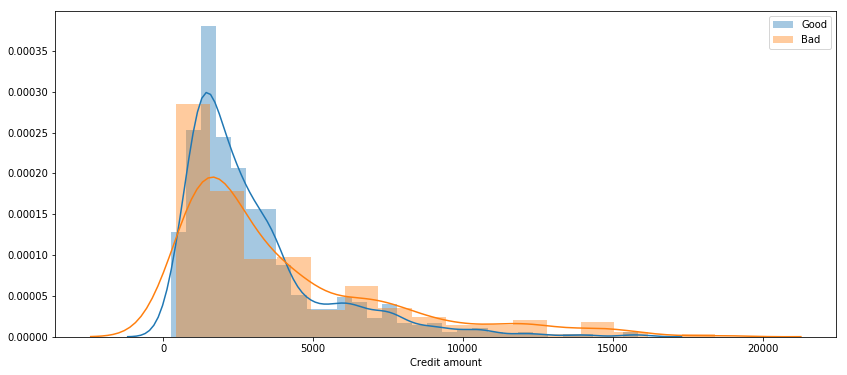

In [59]:
good_mask = data['Risk'] == 'good'
dist_plot_binary(data[good_mask]['Credit amount'], data[~good_mask]['Credit amount'])

We can safely say that we should expect more lower credit amount in good customers compared to bad customers.

# Part B

Aside questions mentioned on Part A, create 10 more questions and answers to understand more about the dataset. 

## 1. What is the median credit amount of each purpose in loan applications?

Purpose
domestic appliances    1249
education              1597
repairs                1749
radio/TV               1890
furniture/equipment    2578
car                    2679
business               3161
vacation/others        6948
Name: Credit amount, dtype: int64


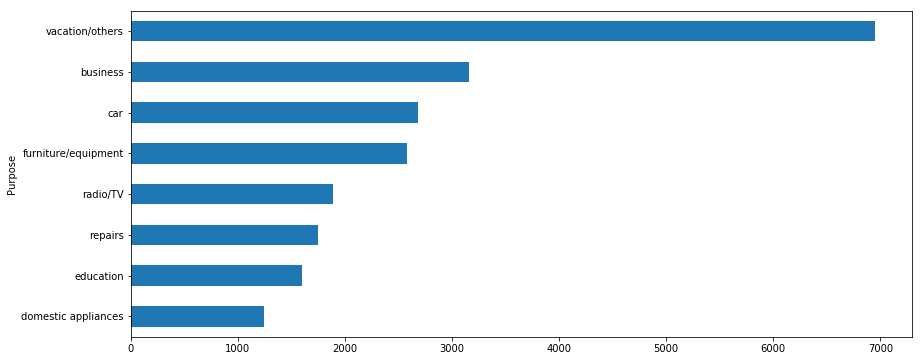

In [119]:
# Visualize
res = data.groupby('Purpose')['Credit amount'].median().sort_values()
fig, ax = plt.subplots(figsize=(14, 6))
res.plot.barh(ax=ax)
print(res)
plt.show()

In [134]:
data['Credit amount'].median()

2319.5

We can see that higher credit amount is in the vacational purposes almost twice as high from business purpose. This may indicates that **recreational purpose are more expensive than other purposes.**

From this data, we can also see that our customers are willing of installment as high as **7000 DM**, with median installment fee of **2319.5 DM**.

## 2. What is the median total credit amount of each purpose of credit?

Purpose
domestic appliances     15099.0
education               24144.0
repairs                 28842.0
radio/TV                29938.5
furniture/equipment     44316.0
car                     46560.0
business                75090.0
vacation/others        265080.0
Name: total_credit_amount, dtype: float64


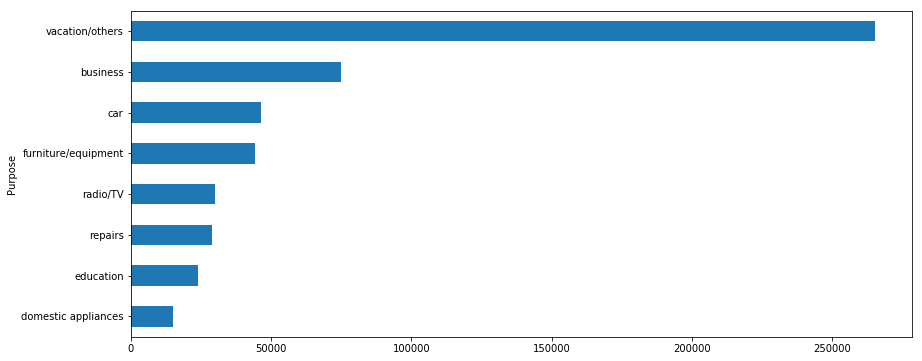

In [121]:
# Create total_credit_amount column
data['total_credit_amount'] = data['Duration'] * data['Credit amount']

# Visualize
res = data.groupby('Purpose')['total_credit_amount'].median().sort_values()
fig, ax = plt.subplots(figsize=(14, 6))
res.plot.barh(ax=ax)
print(res)
plt.show()

We can see that higher credit amount is in the vacational purposes almost **four times** as high from business purpose. This may indicates that **recreational purpose are more expensive than other purposes.**

## 3. What is the purpose of highest total_credit_amount of application?

In [188]:
data.loc[data['total_credit_amount'].idxmax()]

Age                          21
Sex                        male
Job                           2
Housing                     own
Saving accounts          little
Checking account            NaN
Credit amount             15653
Duration                     60
Purpose                radio/TV
Risk                       good
risk_bin                      1
total_credit_amount      939180
Name: 637, dtype: object

Surprisingly, although vacational purpose has the highest median of application, the most expensive total credit amount application is in the `radio/TV` purpose with value of **939180 DM**. 

In [190]:
data[['Purpose', 'total_credit_amount']].sort_values(by=['total_credit_amount'], ascending=False).head(5)

,Purpose,total_credit_amount
637,radio/TV,939180
374,vacation/others,886920
915,vacation/others,884352
95,business,861030
714,car,841620


However, 2nd and 3rd place of highest `total_credit_amount` purpose is still vacation/others, which comply with the median values.

## 4. What is the top 3 purposes by number of credit application?

vacation/others         12
domestic appliances     12
repairs                 22
education               59
business                97
furniture/equipment    181
radio/TV               280
car                    337
Name: Purpose, dtype: int64


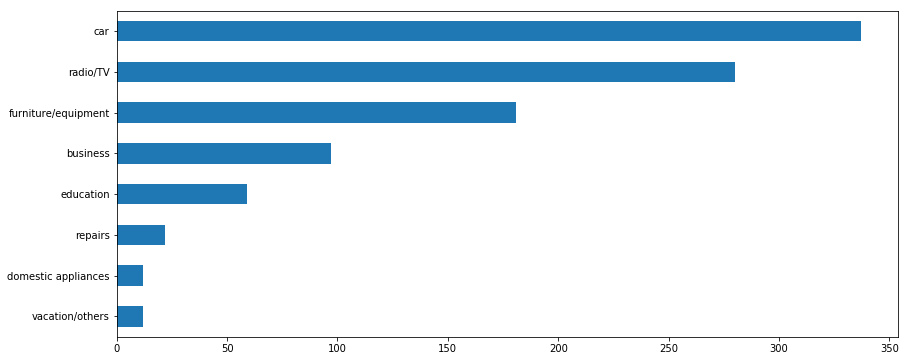

In [136]:
fig, ax = plt.subplots(figsize=(14, 6))
res = data['Purpose'].value_counts().sort_values(ascending=True)
res.plot.barh(ax=ax)
print(res)
plt.show()

Top 3 purpose in applying for credit are: `car`, `radio/TV`, and `furniture/equipment`. With total share of almost **80%** of all contracts.

## 5. What is the total credit amount share of each purposes?

Purpose
domestic appliances      422599
repairs                 1416159
vacation/others         3810872
education               4874099
furniture/equipment    12879955
business               13679668
radio/TV               18920552
car                    33627678
Name: total_credit_amount, dtype: int64


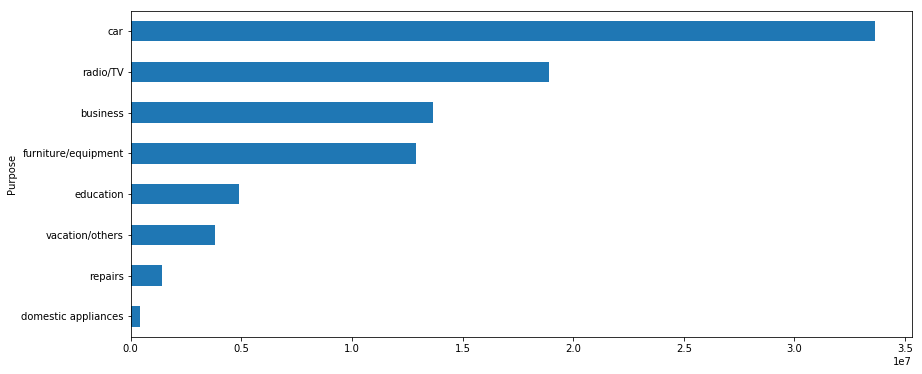

In [158]:
fig, ax = plt.subplots(figsize=(14, 6))
res = data.groupby('Purpose')['total_credit_amount'].sum().sort_values()
res.plot.barh(ax=ax)
print(res)
plt.show()

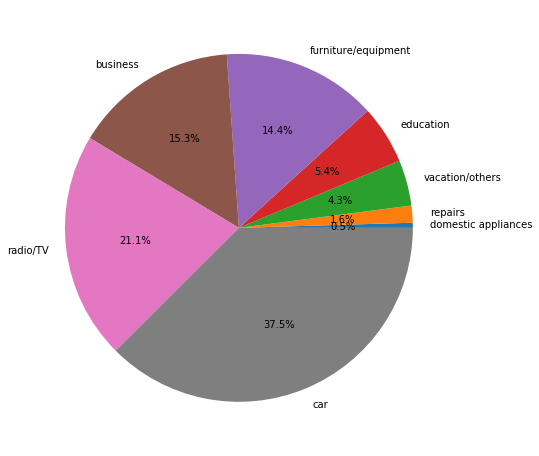

In [156]:
plt.figure(figsize=(14, 8))
plt.pie(res.values, labels=res.index, autopct='%1.1f%%')
plt.show()

Our portfolio mainly consists of `car`, `radio/TV`, and `business` with total of **73%**. Vacational purposes, although having higher median credit amount than the other purposes. 

## 6. Which type of client has large credit amount but short duration?

In [163]:
# Define large credit amount as having amt credit >= third quantile
large_credit_mask = data['Credit amount'] > data['Credit amount'].quantile(0.75)

# Define short duration as less than a year
short_duration_mask = data['Duration'] <= 12

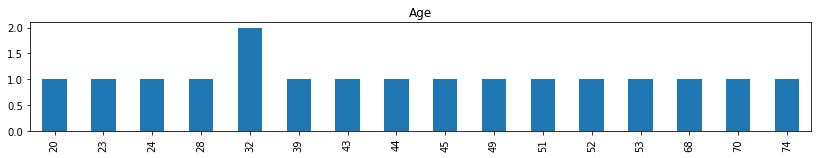

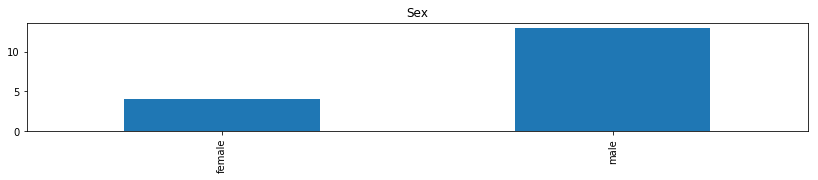

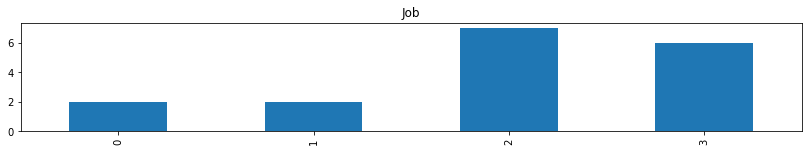

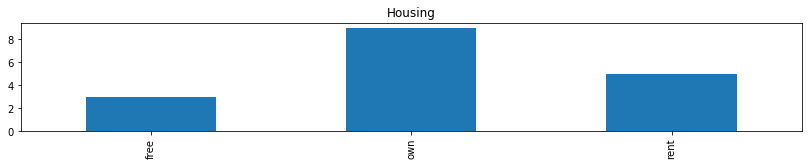

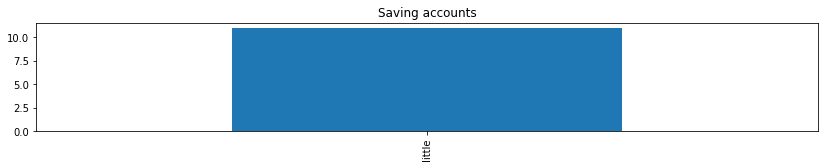

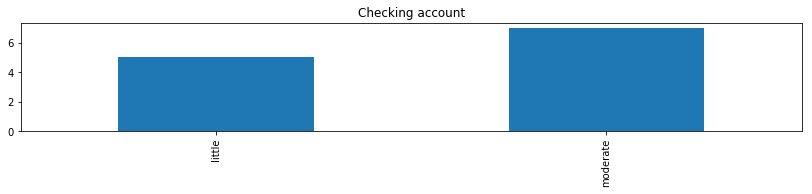

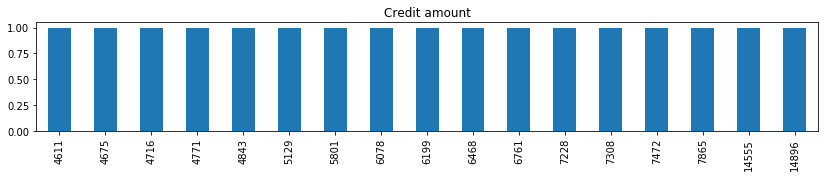

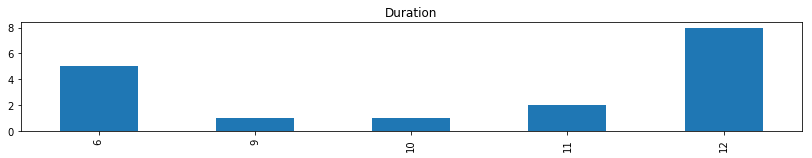

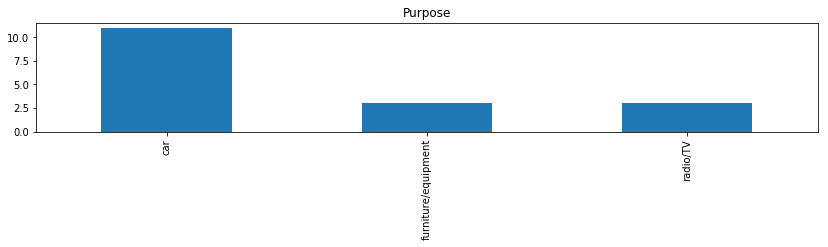

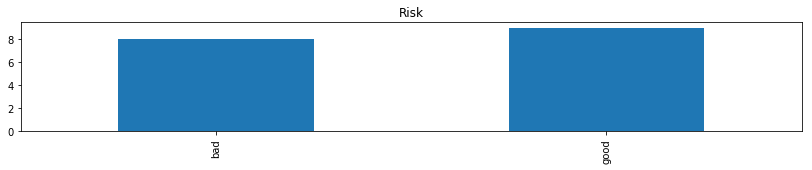

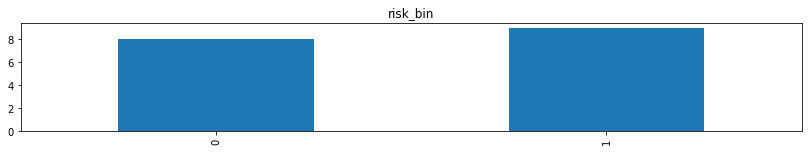

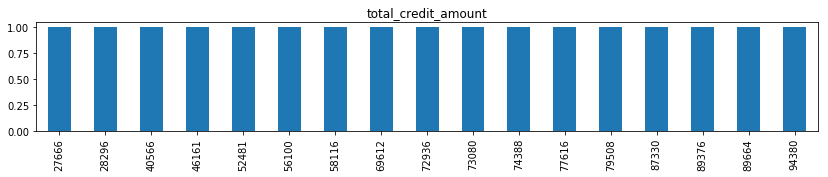

In [235]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(14, 2))
    data[large_credit_mask & short_duration_mask][col].value_counts().sort_index().plot.bar(ax=ax)
    ax.set_title(col)
    plt.show()

Key takeaways describing client who has large credit amount but short duration:
* Most of them **age more than 30**
* Most of then are **male**
* Most of them are **skilled or highly skilled**
* Most of them **own their house**
* **All of them have little ( < 0 DM) saving accounts**
* All of them have **little to moderate checking account**
* The distribution of **purposes is the same as the whole sample**
* **Almost same share of good and bad risk** customers group

## 7. How many own housing customers has higher than moderate in either Checking Account or Saving Accounts?

In [223]:
own_house_mask = data['Housing'] == 'own'
high_ca_mask = [True if x not in ['little', 'moderate', np.nan] else False for x in data['Checking account']]
high_sa_mask = [True if x not in ['little', 'moderate', np.nan] else False for x in data['Saving accounts']]

In [228]:
print("Own housing customers has higher than moderate in either Checking Account or Saving Accounts {}".format(data[own_house_mask & high_ca_mask & high_sa_mask].shape[0]))

Own housing customers has higher than moderate in either Checking Account or Saving Accounts 5


In [230]:
print("Total customers who own house {}".format(data[own_house_mask].shape[0]))

Total customers who own house 713


As we can see, most of our customers who own their house, has little to moderate checking. Surprisingly, this number is very low, which is only **5 from 713** customers.

## 8. What is the main purpose of application for customer who age below 30?

In [231]:
age_below_30_mask = data['Age'] < 30

vacation/others          3
domestic appliances      7
repairs                  8
education               14
business                36
furniture/equipment     84
car                    102
radio/TV               117
Name: Purpose, dtype: int64


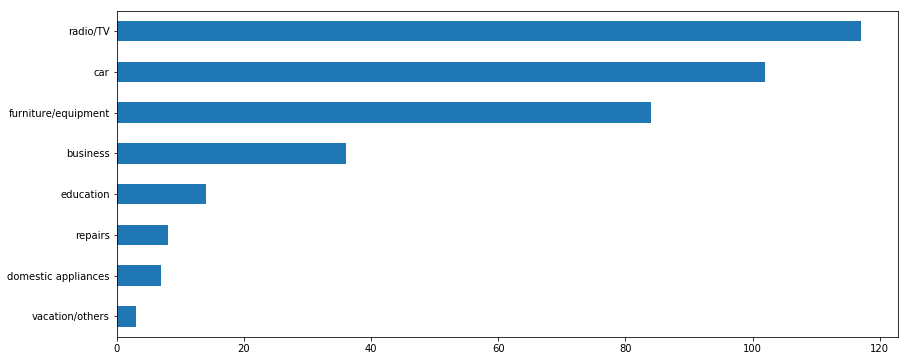

In [234]:
fig, ax = plt.subplots(figsize=(14, 6))
res = data[age_below_30_mask]['Purpose'].value_counts().sort_values(ascending=True)
res.plot.barh(ax=ax)
print(res)
plt.show()

Differ from all sample, young customers tend to apply credit for mainly `radio/TV`, `car`, and `furniture/equipment`. We can infer these all as main household appliances, which make sense as they are entering marriage age and having family.

## 9. What is the distribution of each numerical variables by each risk group? Can we differentiate the risk group by using this variables or its combination?

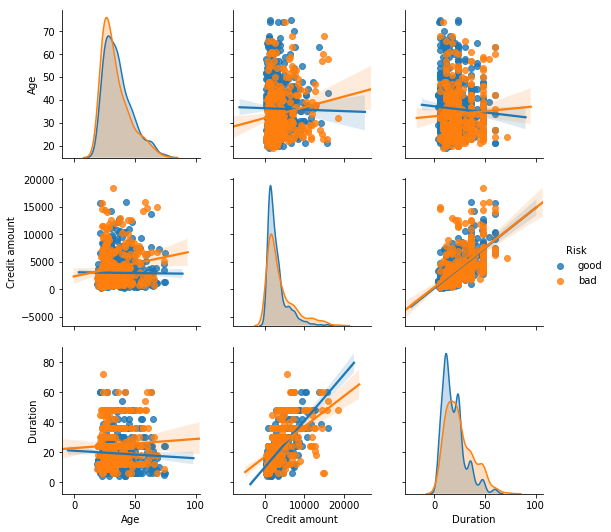

In [100]:
sns.pairplot(data[['Age', 'Credit amount', 'Duration', 'Risk']], hue='Risk', kind='reg')

From the distribution plot, we can infer:
* Age attributes can't separate well between good customers and bad customers.
* Good customers typically has lower credit amount than those bad customers.
* Good customers typically has lower duration than those of bad customers.

For the interaction between attributes, we can infer:
* No interaction attributes can separate well between good and bad customers, the distribution is equally likely for both groups.

## 10. What is the correlation of each numerical attributes value?

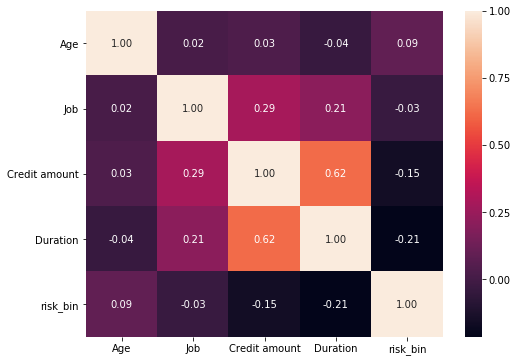

In [92]:
# Create binary integer target column
col_target = 'risk_bin'
data[col_target] = [1 if x == 'good' else 0 for x in data['Risk']]

# Calculate the Spearmans correlation of numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

From above correlation heatmap, we can see there is little to correlation of numerical attributes to the target columns of `Risk`. 

Note that we can also see there is positive correlation between credit amount and duration, which make sense, the bigger the credit amount our customers take, the longer the duration of installment they will select.

# Part C

Define at least 3 business problems that you can find based on the dataset! 

## 1. If we were to create customized loan product for our customers, what will the segmentation be?

## 2. Assuming return rate of good customers 100%, how much return rate of bad customers will we need to gain gross income at least 70% of total portfolio?

## 3. How diverse is our duration (tenure)? Should we reduce the number? Why?